# Problem Statement

#MediBuddy is a digital healthcare platform for an inpatient hospitalization, outpatient
services, and corporate wellness benefits.

#MediBuddy is the award-winning technology platform from Medi Assist that transforms
the health insurance industry at the very core. MediBuddy, with its diverse offerings for
various stakeholders of the health benefits industry, makes the process of discovering,
accessing, utilizing, and monitoring health benefits seamless, real-time, and virtually
paperless.

#The company was founded in 2000 and based in Bangalore, Karnataka, India.

#In the assignment below, there are two datasets, one having the age and BMI(Body
Mass Index) that is received from a pre health checkup before the policy cover; and the
other dataset includes some personal details such as the no. of children, whether the
person smokes or not, the location where the person is from etc.

#In addition, build a machine learning model to predict the
amount spent to the utmost accuracy. Validate and hyper parametrically tune the
model to get the best results.

In [88]:
# DataFrame Libraries
import pandas as pd
import numpy as np

#DataVisualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data-Processing Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve

#labelModel Building Libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
import xgboost
from xgboost import XGBRegressor

#Math Libraries
import scipy.stats as sci

#Metrices Libraries
from sklearn.metrics import r2_score, mean_squared_error

#Clustering Libraries
from sklearn.cluster import KMeans

In [2]:
#Importing The Datasets
MediBuddycsv = pd.read_csv("Medibuddy Insurance Data Price.csv")
MediBuddyxlxs = pd.read_excel("Medibuddy insurance data personal details2.xlsx")

In [3]:
#Understanding the Data
MediBuddycsv.head(5)

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520


In [4]:
#Understanding the Data
MediBuddyxlxs.head(5)

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest


#### Analysis
1. From the above we can understand that there are about 8 features in the particular Dataset.
2. Here Considering that the Policy number is unique we will merge 2 Dataframed based on policy number

In [5]:
# Joining the 2 datasets
MediBuddyNew = pd.merge(MediBuddycsv,MediBuddyxlxs,on='Policy no.',how='inner')

In [6]:
MediBuddyNew.head()

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region
0,PLC156898,19,female,27.900,16884.92400,0,yes,southwest
1,PLC156907,18,male,33.770,1725.55230,1,no,southeast
2,PLC156916,28,male,33.000,4449.46200,3,no,southeast
3,PLC156925,33,male,22.705,21984.47061,0,no,northwest
4,PLC156934,32,male,28.880,3866.85520,0,no,northwest


#### Based on the common feature policy no. we have joined 2 datasets

# Here we will try to Build a machine learning model to predict the amount spent at utmost accuracy.

### Step 1 
- Before creating a EDA report we will have to convert all the Categorical features into Numerical features as the computer doesnot understand the string Values.
- Also we will be dropping the Policy no from the dataset as it wont be a proper feature to predict the model accuracy.
- Here we are considering charges in INR as the the Dependent variables

#### Checking for Missing Values

In [7]:
MediBuddyNew = MediBuddyNew[['Policy no.','age','sex','bmi','children','smoker','region','charges in INR']]

In [8]:
MediBuddyNew = pd.DataFrame(data=MediBuddyNew)

In [9]:
MediBuddyNew.head()

,Policy no.,age,sex,bmi,children,smoker,region,charges in INR
0,PLC156898,19,female,27.900,0,yes,southwest,16884.92400
1,PLC156907,18,male,33.770,1,no,southeast,1725.55230
2,PLC156916,28,male,33.000,3,no,southeast,4449.46200
3,PLC156925,33,male,22.705,0,no,northwest,21984.47061
4,PLC156934,32,male,28.880,0,no,northwest,3866.85520


In [10]:
# Code to find the missing values using vizualisation
def miss_val_viz(df):
    missingvalues =df.isnull()
    plt.figure(figsize=(15,15))
    sns.heatmap(missingvalues,yticklabels=False,cmap='viridis')
    plt.show()

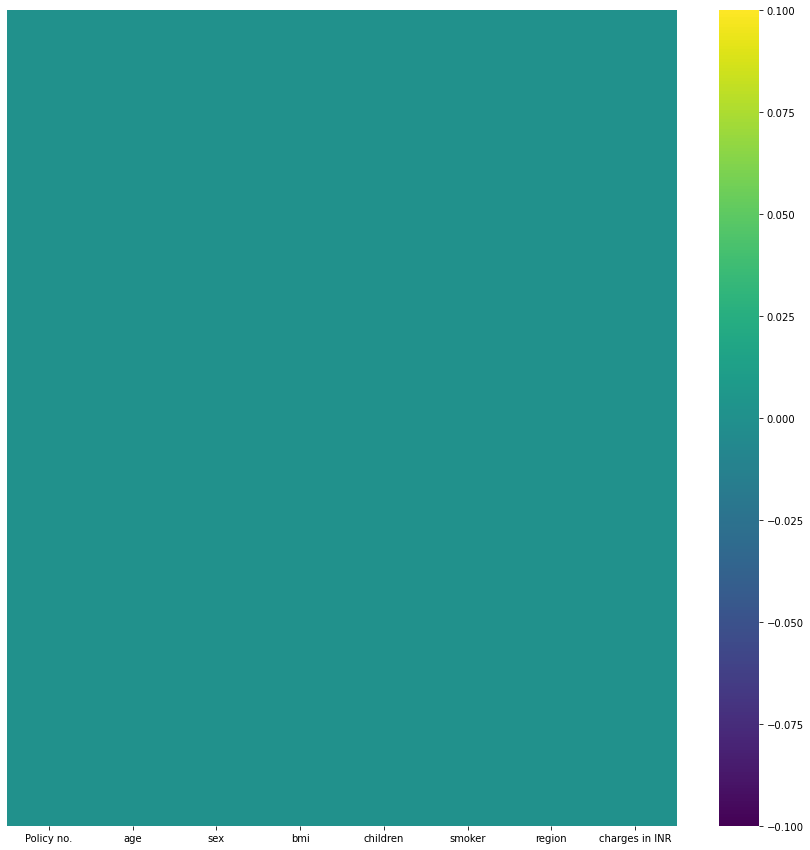

In [11]:
miss_val_viz(MediBuddyNew)

In [12]:
# Code to find the missing values using sum of counts.
def miss_value_count(df):
    miss_val_counts = df.isnull().sum()
    return (miss_val_counts)

In [13]:
miss_value_count(MediBuddyNew)

Policy no.        0
age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges in INR    0
dtype: int64

#### Analysis
1. As there are no missing values, we don't have to perform any kind of missing value treatment

#### As you can see from the data that it has categorical values, we will have to convert the same into integers or continous form.

In [14]:
MediBuddyNew.head()

,Policy no.,age,sex,bmi,children,smoker,region,charges in INR
0,PLC156898,19,female,27.900,0,yes,southwest,16884.92400
1,PLC156907,18,male,33.770,1,no,southeast,1725.55230
2,PLC156916,28,male,33.000,3,no,southeast,4449.46200
3,PLC156925,33,male,22.705,0,no,northwest,21984.47061
4,PLC156934,32,male,28.880,0,no,northwest,3866.85520


In [15]:
#Dropping the Column Policy no.
MediBuddyNew = MediBuddyNew.drop('Policy no.',axis=1)

In [16]:
MediBuddyNew.dtypes

age                 int64
sex                object
bmi               float64
children            int64
smoker             object
region             object
charges in INR    float64
dtype: object

In [17]:
def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == object:
            LaEn = LabelEncoder()
            df[col]= LaEn.fit_transform(df[col])
        else:
            pass

In [18]:
label_encoding(MediBuddyNew)

In [19]:
MediBuddyNew.head()

,age,sex,bmi,children,smoker,region,charges in INR
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#### Creating A EDA Report

In [20]:
def describe(my_df):
    
    #creating an empty list for columns and appending everything into that
    cols=[]
    for i in my_df.columns:
        if my_df[i].dtype != object:
            cols.append(i)
    
    
    #Now we are describing which needs to be set as columns and what needs to be set as index in Dataframe
    result = pd.DataFrame(columns= cols,index= ['DataType','Count','Min', 'Q1', 'Q2', 'Mean', 'Q3', 'Max', 'Std','Skew','Kurt','Range','IQR','Skewness comment','Outlier comment','Kurtosis comment'])
    
    for i in result.columns:
        result.loc['DataType',i] = my_df[i].dtype
        result.loc['Count',i] = my_df[i].count()
        result.loc['Min',i] = my_df[i].min()
        result.loc['Q1',i] = my_df[i].quantile(0.25)
        result.loc['Q2',i] = my_df[i].quantile(0.5)
        result.loc['Mean',i] = round(my_df[i].mean(),2)
        result.loc['Q3',i] = my_df[i].quantile(0.75)
        result.loc['Max',i] = my_df[i].max()
        result.loc['Std',i] = round(my_df[i].std(),2)
        result.loc['Skew',i] = round(my_df[i].skew(),2)
        result.loc['Kurt',i] = round(my_df[i].kurt(),2)
        result.loc['Range',i] = my_df[i].max() - my_df[i].min()
        result.loc['IQR',i] = my_df[i].quantile(0.75) - my_df[i].quantile(0.25)
        
        #Adding comments for skewness
        if result.loc['Skew',i] <= -1:
            sk_label = "Highly negatively skewed"
        elif -1 < result.loc['Skew',i] <= -0.5:
            sk_label = "Moderately negatively skewed"
        elif -0.5 < result.loc['Skew',i] < 0:
            sk_label = "Approx normal distribution(-ve)"
        elif 0 <= result.loc['Skew',i] < 0.5:
            sk_label = "Approx normal distribution(+ve)"
        elif 0.5 <= result.loc['Skew',i] < 1:
            sk_label = "Moderately positively skewed"
        elif result.loc['Skew',i] >= 1:
            sk_label = "Highly positively skewed"
        else:
            sk_label = 'Error'
        result.loc['Skewness comment', i] = sk_label
        
    # Adding comments for outliers
        upperlimit = result.loc['Q3',i] + (1.5 * result.loc['IQR',i])
        lowerlimit = result.loc['Q1',i] - (1.5 * result.loc['IQR',i])
    
        if len([x for x in my_df[i] if x < lowerlimit or x > upperlimit]) > 0:
            outlier_label = "Have outliers"
        else:
            outlier_label = "No outliers"
        result.loc['Outlier comment', i] = outlier_label
        
    # Adding kurtosis comment
        if result.loc['Kurt',i] <= -1:
            kt_label = "Highly platykurtic curve"
        elif -1 < result.loc['Kurt',i] <= -0.5:
            kt_label = "Moderately platykurtic curve"
        elif -0.5 < result.loc['Kurt',i] < 0.5:
            kt_label = "Mezokurtic curve"
        elif 0.5 <= result.loc['Kurt',i] < 1:
            kt_label = "Moderately leptokurtic curve"
        elif result.loc['Kurt',i] >= 1:
            kt_label = "Highly leptokurtic curve"
        else:
            kt_label = 'Error'
        result.loc['Kurtosis comment', i] = kt_label
    display(result)

In [21]:
describe(MediBuddyNew)

,age,sex,bmi,children,smoker,region,charges in INR
DataType,int64,int32,float64,int64,int32,int32,float64
Count,1338,1338,1338,1338,1338,1338,1338
Min,18,0,15.96,0,0,0,1121.8739
Q1,27.0,0.0,26.29625,0.0,0.0,1.0,4740.28715
Q2,39.0,1.0,30.4,1.0,0.0,2.0,9382.033
Mean,39.21,0.51,30.66,1.09,0.2,1.52,13270.42
Q3,51.0,1.0,34.69375,2.0,0.0,2.0,16639.912515
Max,64,1,53.13,5,1,3,63770.42801
Std,14.05,0.5,6.1,1.21,0.4,1.1,12110.01
Skew,0.06,-0.02,0.28,0.94,1.46,-0.04,1.52


# Analysis
1. Through this report we can see that there is skewness in feature called as smoker
2. we can treat the same by performing transformations

In [22]:
def histogram(df):
    for col in df.columns:
        if col!='charges in INR':
            plt.figure(figsize=(10,10))
            sns.distplot(df[col]).set_title(f'{col} Histogram')

C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

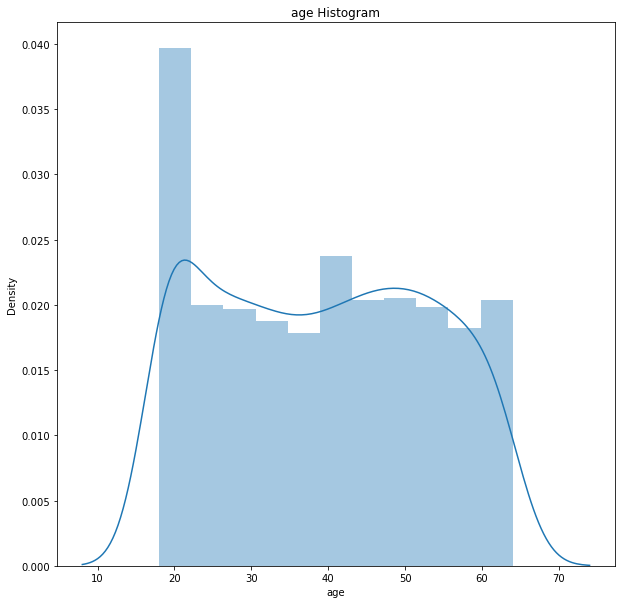

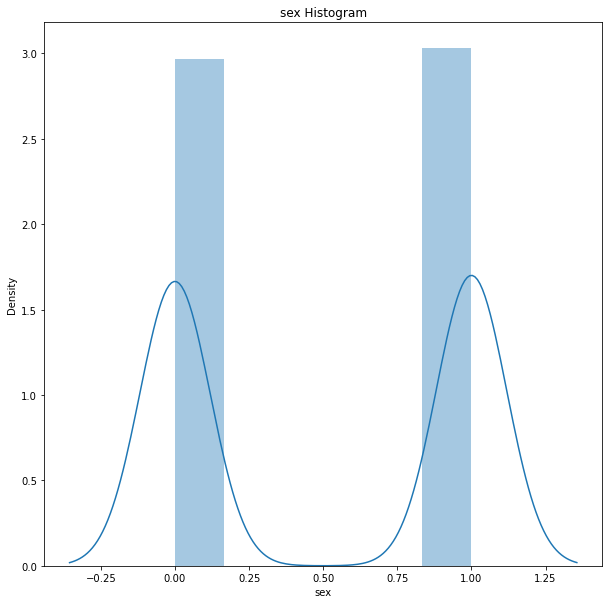

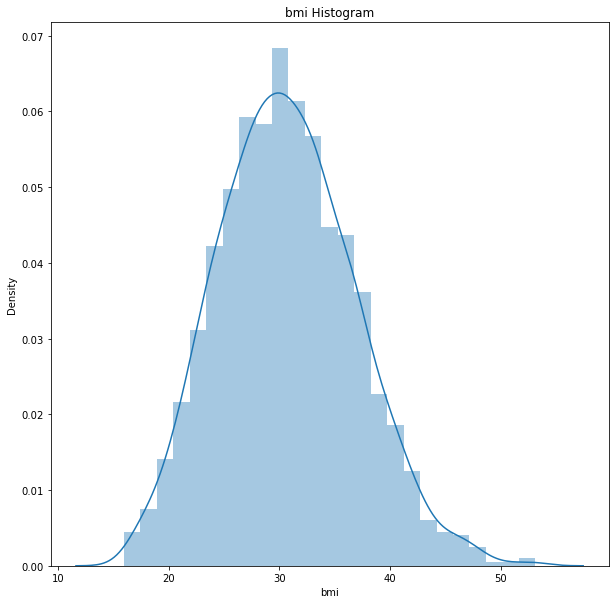

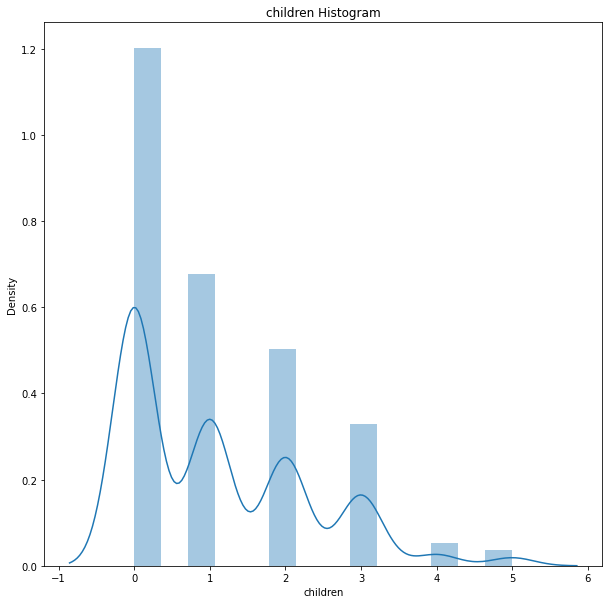

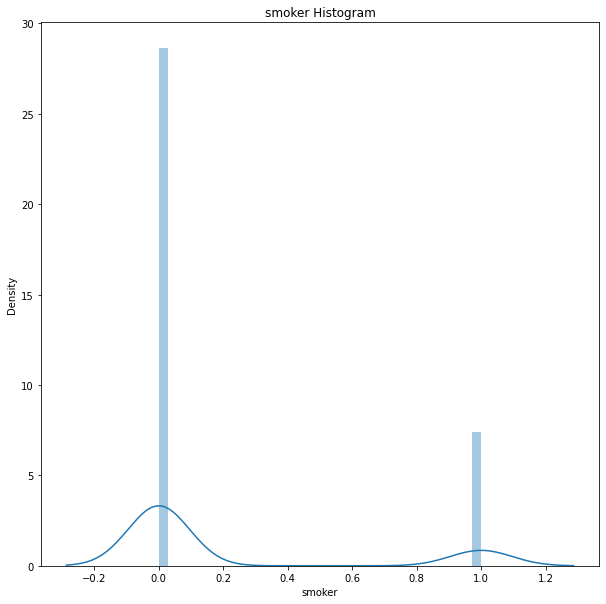

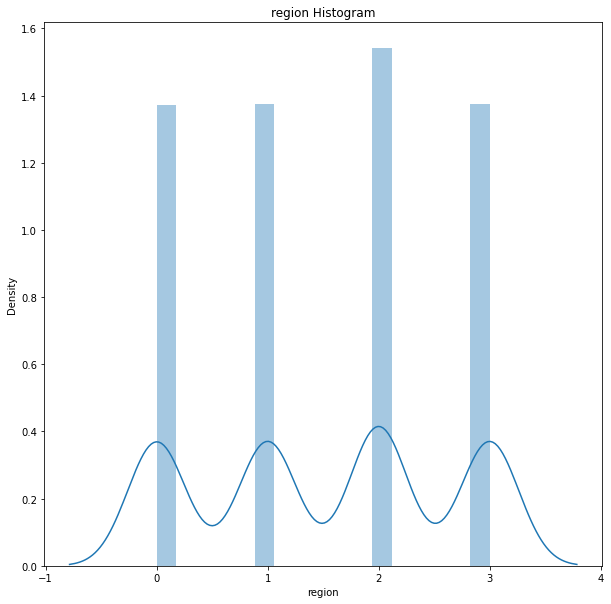

In [23]:
histogram(MediBuddyNew)

In [24]:
def Boxplot(df):
    for col in df.columns:
        if col!='charges in INR':
            plt.figure(figsize=(10,10))
            sns.boxplot(df[col]).set_title(f'{col} Boxplot')

C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\li

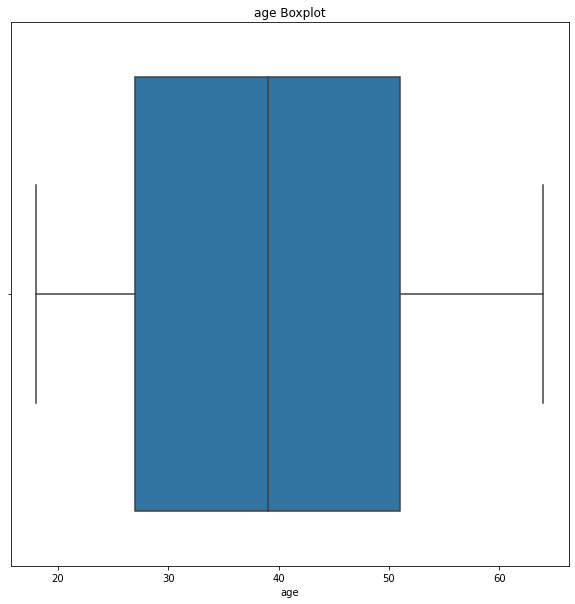

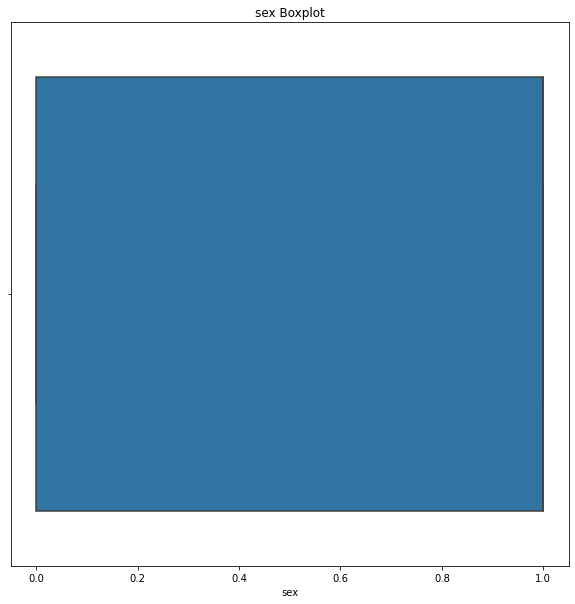

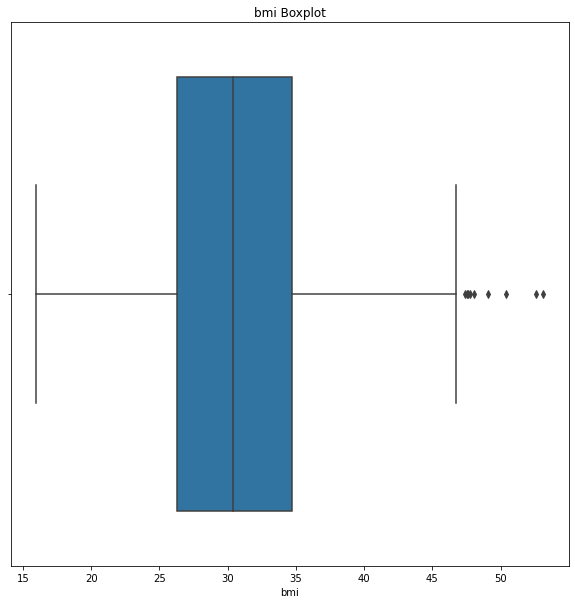

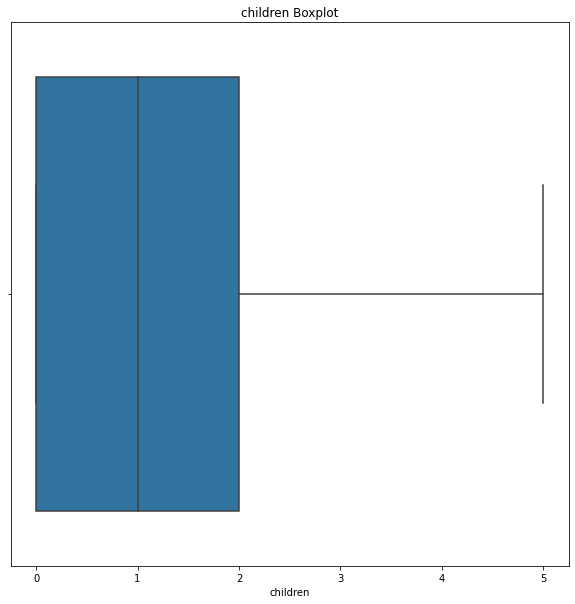

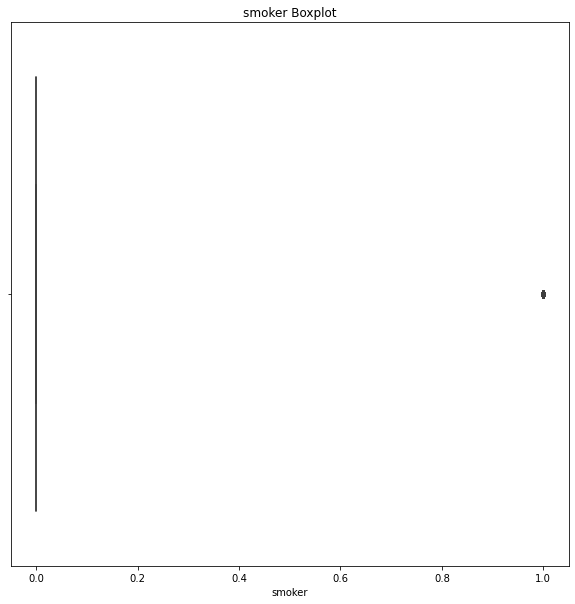

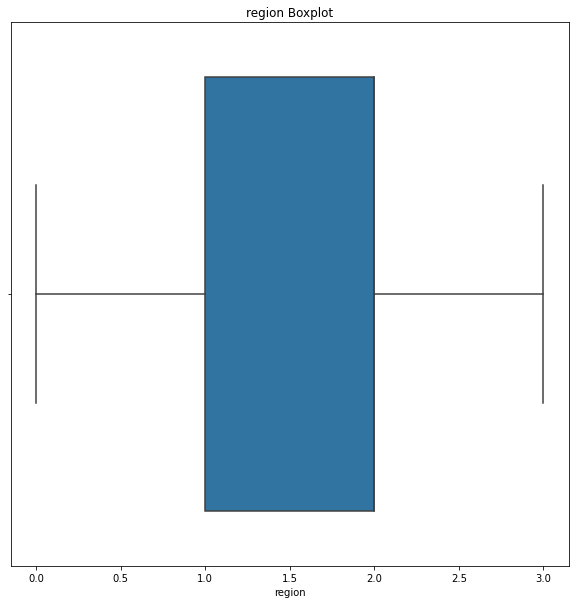

In [25]:
Boxplot(MediBuddyNew)

In [26]:
def correlation(df):
    correlation1 = df.corr()
    plt.figure(figsize=(10,10))
    sns.heatmap(correlation1,annot=True)
    plt.show()

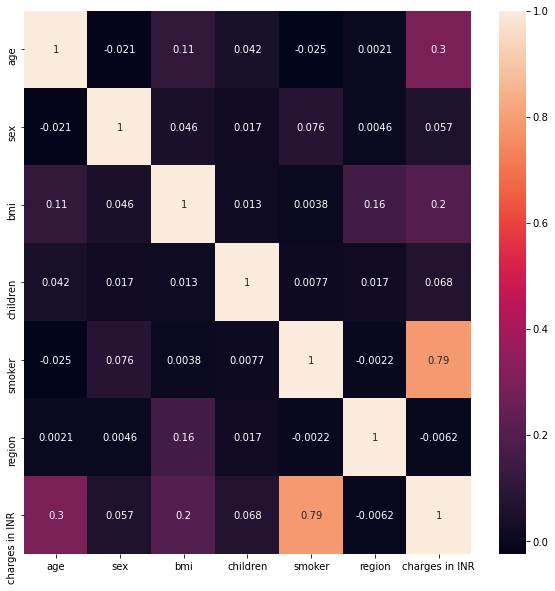

In [27]:
correlation(MediBuddyNew)

In [28]:
sqrt_trans_data = MediBuddyNew.copy()

In [29]:
def sqrt_trans(df,t_col):
    df[t_col]= np.sqrt(df[t_col])
    pass

In [30]:
sqrt_trans(sqrt_trans_data,'bmi')
sqrt_trans(sqrt_trans_data,'smoker')

In [31]:
sqrt_trans_data.head()

,age,sex,bmi,children,smoker,region,charges in INR
0,19,0,5.282045,0,1.0,3,16884.92400
1,18,1,5.811196,1,0.0,2,1725.55230
2,28,1,5.744563,3,0.0,2,4449.46200
3,33,1,4.764976,0,0.0,1,21984.47061
4,32,1,5.374012,0,0.0,1,3866.85520


In [32]:
describe(sqrt_trans_data)

,age,sex,bmi,children,smoker,region,charges in INR
DataType,int64,int32,float64,int64,float64,int32,float64
Count,1338,1338,1338,1338,1338,1338,1338
Min,18,0,3.994997,0,0.0,0,1121.8739
Q1,27.0,0.0,5.127987,0.0,0.0,1.0,4740.28715
Q2,39.0,1.0,5.51362,1.0,0.0,2.0,9382.033
Mean,39.21,0.51,5.51,1.09,0.2,1.52,13270.42
Q3,51.0,1.0,5.89014,2.0,0.0,2.0,16639.912515
Max,64,1,7.289033,5,1.0,3,63770.42801
Std,14.05,0.5,0.55,1.21,0.4,1.1,12110.01
Skew,0.06,-0.02,0.01,0.94,1.46,-0.04,1.52


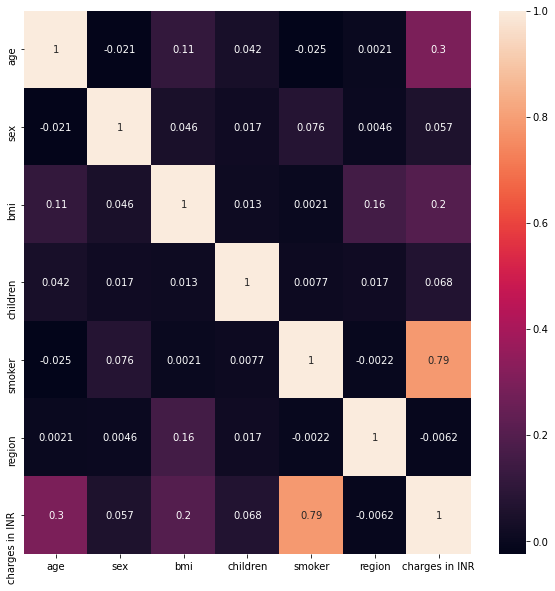

In [33]:
correlation(sqrt_trans_data)

### VIF TO CHECK FOR MULTICOLINEARITY

In [34]:
def vif(features):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif['vif_factor'] = [variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
    vif['features']=features.columns
    
    return vif.sort_values('vif_factor')

In [35]:
vif(sqrt_trans_data.drop('charges in INR',axis=1))

,vif_factor,features
4,1.262849,smoker
3,1.821542,children
1,2.033427,sex
5,2.958100,region
0,8.699006,age
2,12.632711,bmi


# Co-relation percentage with the target

In [36]:
def corr_with_target(df,t_col):
    independent_variables = df.drop(t_col,axis=1).columns
    corr_result=[]
    for col in independent_variables:
        corr_result.append(df[t_col].corr(df[col]))
    result = pd.DataFrame([independent_variables,corr_result],index=['Independent variables','Correlation']).T
    return result.sort_values('Correlation')

In [37]:
corr_with_target(sqrt_trans_data,'charges in INR')

,Independent variables,Correlation
5,region,-0.006208
1,sex,0.057292
3,children,0.067998
2,bmi,0.19938
0,age,0.299008
4,smoker,0.787251


In [38]:
transformed_df = sqrt_trans_data.drop('charges in INR',axis=1).copy()

#### APPLYING PCA TO RUN MULTICOLINEARITY

In [39]:
def Pca(x):
    
    n_com =len(x.columns)
    
    # applying standard scaler
    from sklearn.preprocessing import StandardScaler
    x= StandardScaler().fit_transform(x)
    
    #applying PCA
    from sklearn.decomposition import PCA
    
    for i in range(1,n_com):
        pca = PCA(n_components=i)
        p_comp = pca.fit_transform(x)
        evr=np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1]>0.9:
            n_components=i
            break
            
    
    print('Explained Variance Ratio after PCA is',evr)
    
    #creating a  dataframe
    col=[]
    for j in range(1,n_components+1):
        col.append('pc_'+str(j))
    
    pca_df = pd.DataFrame(p_comp,columns=col)
    return pca_df

In [40]:
#transformed_df = Pca(transformed_df)

In [41]:
# 1. Normal Model
# Train and test split

def train_and_test_split(df,t_col,testsize=0.3):
    x = df.drop(t_col,axis=1)
    y = df[t_col]
    return train_test_split(x,y,test_size=testsize,random_state=0)

In [42]:
# Model Building Function

def build_model(model_name,estimator,df,t_col):
    x_train,x_test,y_train,y_test = train_and_test_split(df,t_col)
    estimator.fit(x_train,y_train)
    y_pred = estimator.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2score= r2_score(y_test,y_pred)
    temp = [model_name,rmse,r2score]
    return temp

In [43]:
build_model('LinearRegression',LinearRegression(),sqrt_trans_data,'charges in INR')

['LinearRegression', 5777.395438316122, 0.7906916033879201]

# Building multiple models

In [44]:
def multiple_models(df,t_col):
    col_names = ['Model_Name','RMSC','R2_score']
    result = pd.DataFrame(columns=col_names)
    result.loc[len(result)] = build_model('LinearRegression',LinearRegression(),df,t_col)
    result.loc[len(result)] = build_model('SVR',SVR(),df,t_col)
    result.loc[len(result)] = build_model('Lasso',Lasso(),df,t_col)
    result.loc[len(result)] = build_model('Ridge',Ridge(),df,t_col)
    result.loc[len(result)] = build_model('Decision Tree',DecisionTreeRegressor(),df,t_col)
    result.loc[len(result)] = build_model('XG_boost',XGBRegressor(),df,t_col)
    result.loc[len(result)] = build_model('ADA_boost',AdaBoostRegressor(),df,t_col)
    result.loc[len(result)] = build_model('Random_forest',RandomForestRegressor(),df,t_col)
    result.loc[len(result)] = build_model('Gradient_boosting',GradientBoostingRegressor(),df,t_col)
    result.loc[len(result)] = build_model('KNN_Regressor',KNeighborsRegressor(),df,t_col)
    return result

In [45]:
multiple_models(sqrt_trans_data,'charges in INR')

,Model_Name,RMSC,R2_score
0,LinearRegression,5777.395438,0.790692
1,SVR,13173.920103,-0.088310
2,Lasso,5777.728626,0.790667
3,Ridge,5783.730235,0.790232
4,Decision Tree,7106.257221,0.683332
5,XG_boost,5327.585513,0.822015
6,ADA_boost,4924.397201,0.847935
7,Random_forest,4806.743391,0.855115
8,Gradient_boosting,4281.473913,0.885050
9,KNN_Regressor,9695.006636,0.410588


In [46]:
# Cross Validation

def k_fold_cv(x,y,fold=10):
    
    score_lr = cross_val_score(LinearRegression(),x,y,cv=fold)
    score_svr = cross_val_score(SVR(),x,y,cv=fold)
    score_lasso = cross_val_score(Lasso(),x,y,cv=fold)
    score_Ridge = cross_val_score(Ridge(),x,y,cv=fold)
    score_DT = cross_val_score(DecisionTreeRegressor(),x,y,cv=fold)
    score_Xgboost = cross_val_score(XGBRegressor(),x,y,cv=fold)
    score_Ada = cross_val_score(AdaBoostRegressor(),x,y,cv=fold)
    score_RM = cross_val_score(RandomForestRegressor(),x,y,cv=fold)
    score_GB = cross_val_score(GradientBoostingRegressor(),x,y,cv=fold)
    score_KNN = cross_val_score(KNeighborsRegressor(),x,y,cv=fold)
    
    
    model_names=['LinearRegression','SVR','Lasso','Ridge','DecisionTree','XGBoost','ADA','RandomForest','Gradient_boost','K_Neighbours']
    score = [score_lr,score_svr,score_lasso,score_Ridge,score_DT,score_Xgboost,score_Ada,score_RM,score_GB,score_KNN]
    
    result = []
    
    for i in range(0,len(model_names)):
        score_mean = np.mean(score[i])
        score_std = np.std(score[i])
        m_names = model_names[i]
        temp = [m_names,score_mean,score_std]
        result.append(temp)
    
    
    Kfold_df = pd.DataFrame(result,columns=['model_names','score_mean','score_std'])
    return Kfold_df

In [47]:
k_fold_cv(sqrt_trans_data.drop('charges in INR',axis=1),sqrt_trans_data['charges in INR'])

,model_names,score_mean,score_std
0,LinearRegression,0.745332,0.041425
1,SVR,-0.104844,0.030957
2,Lasso,0.745338,0.041406
3,Ridge,0.745347,0.041058
4,DecisionTree,0.700948,0.042458
5,XGBoost,0.810115,0.056858
6,ADA,0.817057,0.040704
7,RandomForest,0.831252,0.047258
8,Gradient_boost,0.855874,0.045408
9,K_Neighbours,0.392608,0.082268


1. Gradiant Boosting - r2_score - 0.8558
2. Random Forest - r2_score - 0.8328
3. ADA Boost - r2_score - 0.8211
4. XG Boost - r2_score - 0.8101
5. Ridge - r2_score - 0.745347
6. Linear Regression - r2_score - 0.745332

In [48]:
def tuning(x,y,kfold=10):
    
    # parameter Grid
    param_ridge = {'alpha':[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]}
    params_rf = param_rf = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
    param_gboost = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_ada = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_xg = {'alpha':[0,1],'gamma':[10,20,30,40,50,60,70,80,90,100],'reg_lambda':[0,1]}
    
    # Hyper Parameter tuning
    
   
    tune_ridge = GridSearchCV(Ridge(),param_ridge,cv=kfold)
    tune_rf = GridSearchCV(RandomForestRegressor(),param_rf,cv=kfold)
    tune_gboost = GridSearchCV(GradientBoostingRegressor(),param_gboost,cv=kfold)
    tune_ada = GridSearchCV(AdaBoostRegressor(),param_ada,cv=kfold)
    tune_xg = GridSearchCV(XGBRegressor(),param_xg,cv=kfold)
    
    
    #Fitting x and y
    tune_ridge.fit(x,y)
    tune_rf.fit(x,y)
    tune_gboost.fit(x,y)
    tune_ada.fit(x,y)
    tune_xg.fit(x,y)
    
    tune = [tune_ridge,tune_rf,tune_gboost,tune_ada,tune_xg]
    models = ['Ridge','RF','Gboost','Ada','XG']
    
    for i in range(0,len(tune)):
        print('Model',models[i])
        print('best_parameters',tune[i].best_params_)

In [50]:
#tuning(sqrt_trans_data.drop('charges in INR',axis=1),sqrt_trans_data['charges in INR'])

Model Ridge
best_parameters {'alpha': 1}
Model RF
best_parameters {'max_depth': 10, 'n_estimators': 400}
Model Gboost
best_parameters {'alpha': 0.5}
Model Ada
best_parameters {'learning_rate': 0.1}
Model XG
best_parameters {'alpha': 0, 'gamma': 100, 'reg_lambda': 1}

In [82]:
# Cross Validation

def k_fold_cv1(x,y,fold=10):
    
    score_lr = cross_val_score(LinearRegression(),x,y,cv=fold)
    score_Ridge = cross_val_score(Ridge(alpha=1),x,y,cv=fold)
    score_Xgboost = cross_val_score(XGBRegressor(alpha=0,gamma =100,reg_lambda=1),x,y,cv=fold)
    score_Ada = cross_val_score(AdaBoostRegressor(learning_rate=0.1),x,y,cv=fold)
    score_RM = cross_val_score(RandomForestRegressor(max_depth=10,n_estimators=400),x,y,cv=fold)
    score_GB = cross_val_score(GradientBoostingRegressor(alpha=0.5),x,y,cv=fold)
    
    
    model_names=['LinearRegression','Ridge','XGBoost','ADA','RandomForest','Gradient_boost']
    score = [score_lr,score_Ridge,score_Xgboost,score_Ada,score_RM,score_GB]
    
    result = []
    
    for i in range(0,len(model_names)):
        score_mean = np.mean(score[i])
        score_std = np.std(score[i])
        m_names = model_names[i]
        temp = [m_names,score_mean,score_std]
        result.append(temp)
    
    
    Kfold_df = pd.DataFrame(result,columns=['model_names','score_mean','score_std'])
    Kfold_df1 = Kfold_df.sort_values('score_mean')
    return Kfold_df1

In [52]:
k_fold_cv1(sqrt_trans_data.drop('charges in INR',axis=1),sqrt_trans_data['charges in INR'])

,model_names,score_mean,score_std
0,LinearRegression,0.745332,0.041425
1,Ridge,0.745347,0.041058
2,XGBoost,0.810390,0.056537
3,ADA,0.830677,0.031160
4,RandomForest,0.837926,0.046157
5,Gradient_boost,0.855950,0.045396


#### Using Clustering to see if the accuracy improves

In [59]:
labels = KMeans(n_clusters=2,random_state=50)

In [60]:
cluster=labels.fit_predict(sqrt_trans_data.drop('charges in INR',axis=1))

In [61]:
#Just checking the cluster with a independent variable

In [62]:
# Function for Clustering
def clustering(x,t_col,cluster):
    column= list(set(list(x.columns))- set(sqrt_trans_data['charges in INR'])) #here we are taking the length of unique columns and deleting the strength column (Basically all the independent features are visible)
    #print(column)
    r= int(len(column)/2) #here we are dividing the length of columns /2 and converting it into integers format
    #print(r)
    if r%2==0: #here we are saying we need it to be a even number when the output is being returned
        r=r
    else:      #if not an even number then convert it into a even number
        r=r+1
    
    
    
    f,ax=plt.subplots(r,2,figsize=(15,15))
    a=0
    for row in range(0,r):
        for col in range(0,2):
            if a!= len(column):
                ax[row][col].scatter(x[t_col],x[column[a]],c=cluster)
                ax[row][col].set_xlabel(t_col)
                ax[row][col].set_ylabel(column[a])
                a=a+1

In [63]:
x= sqrt_trans_data.drop('charges in INR',axis=1)

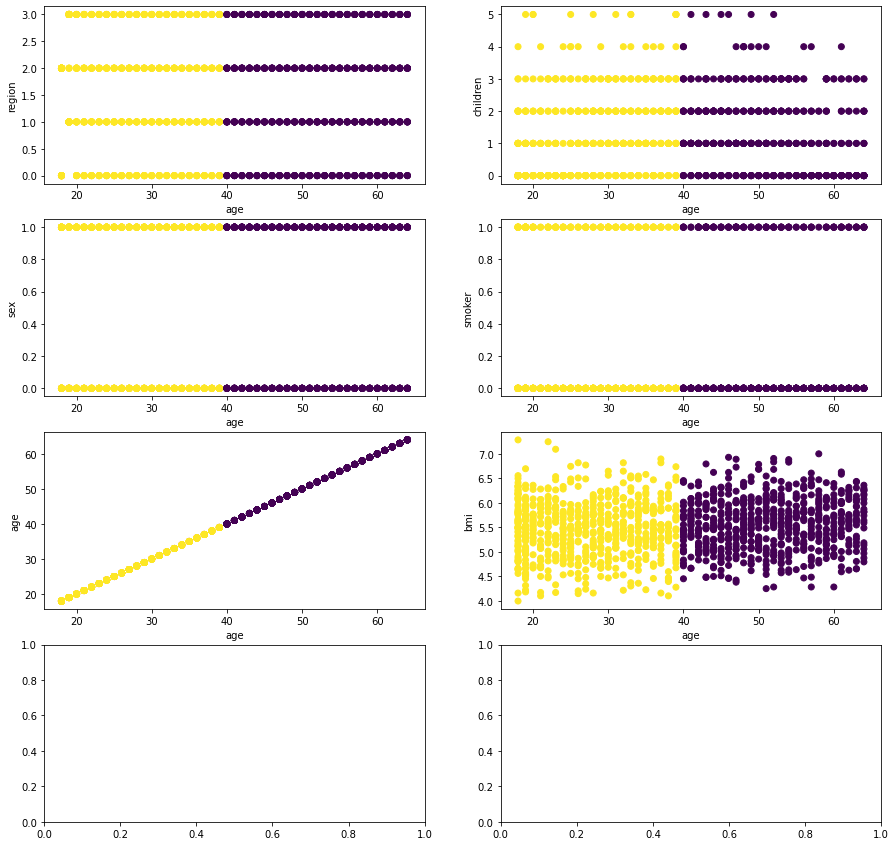

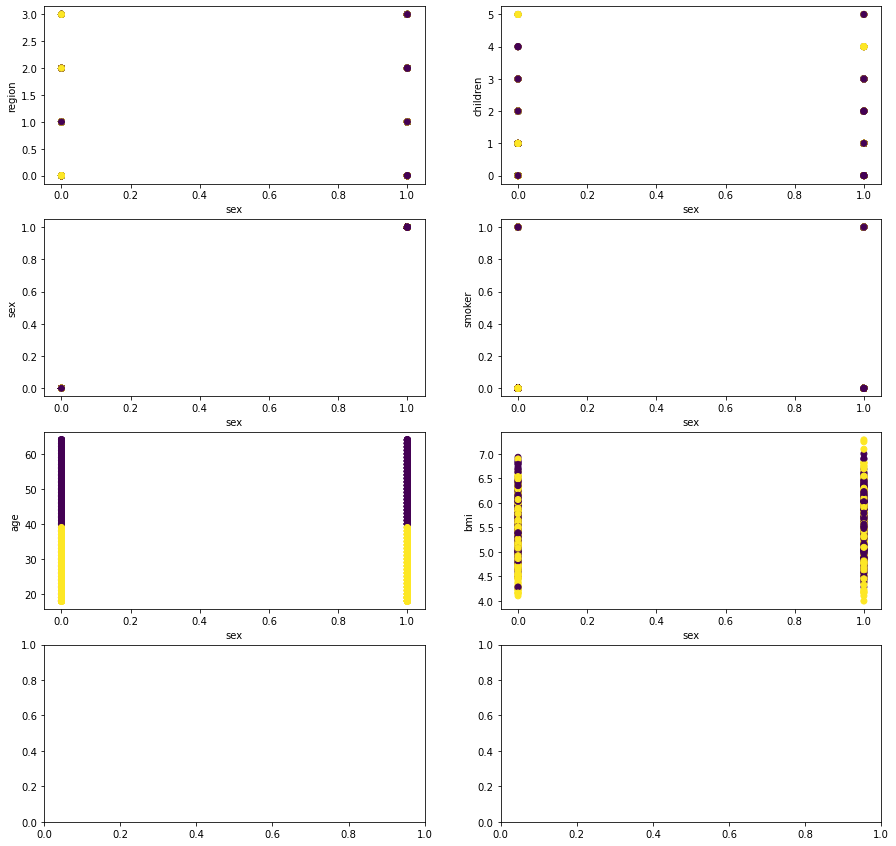

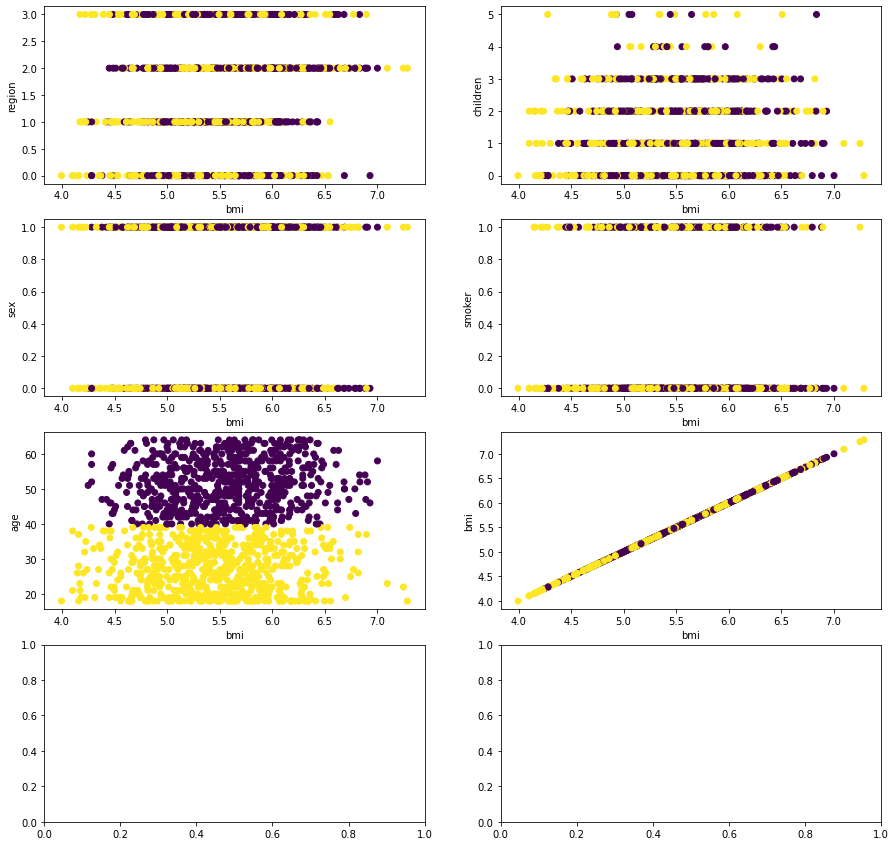

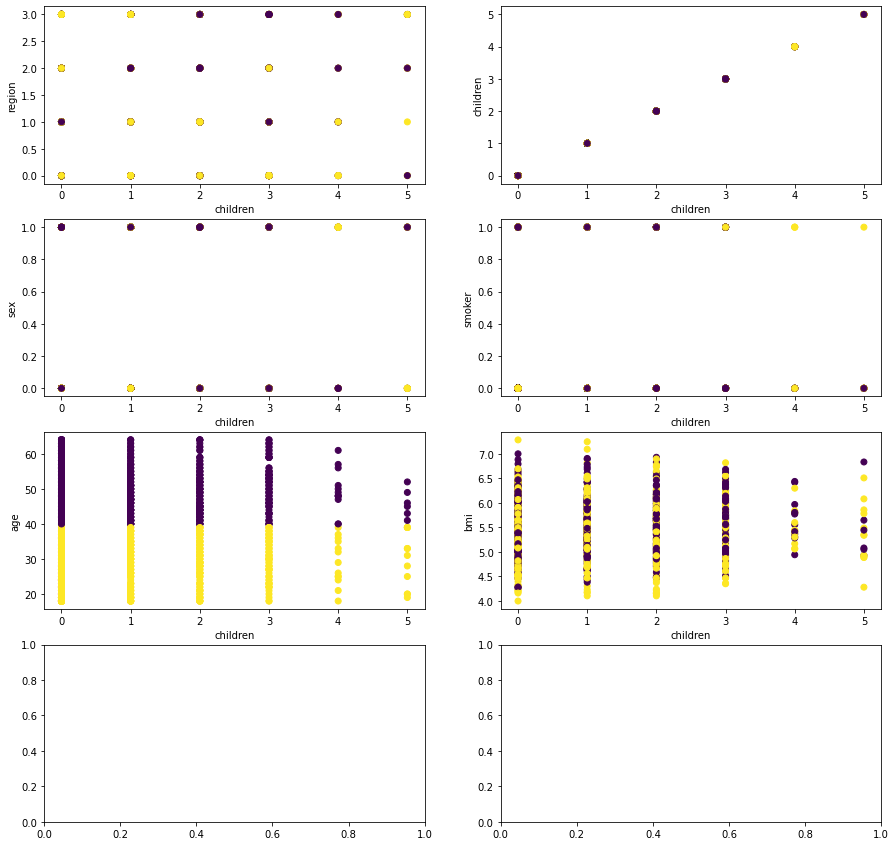

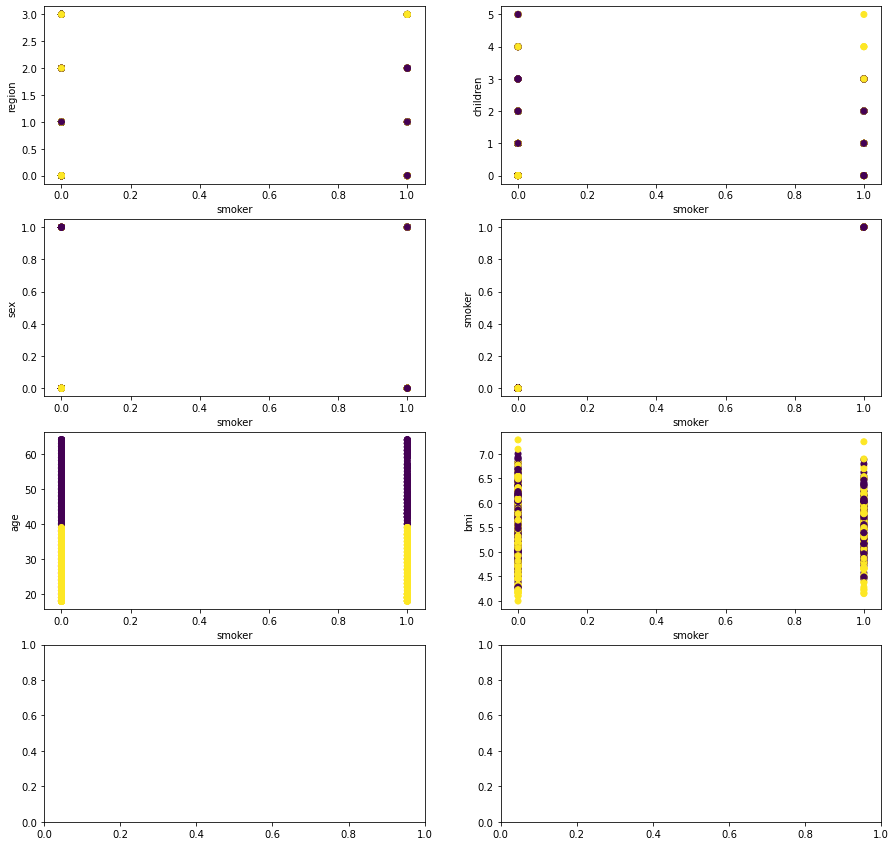

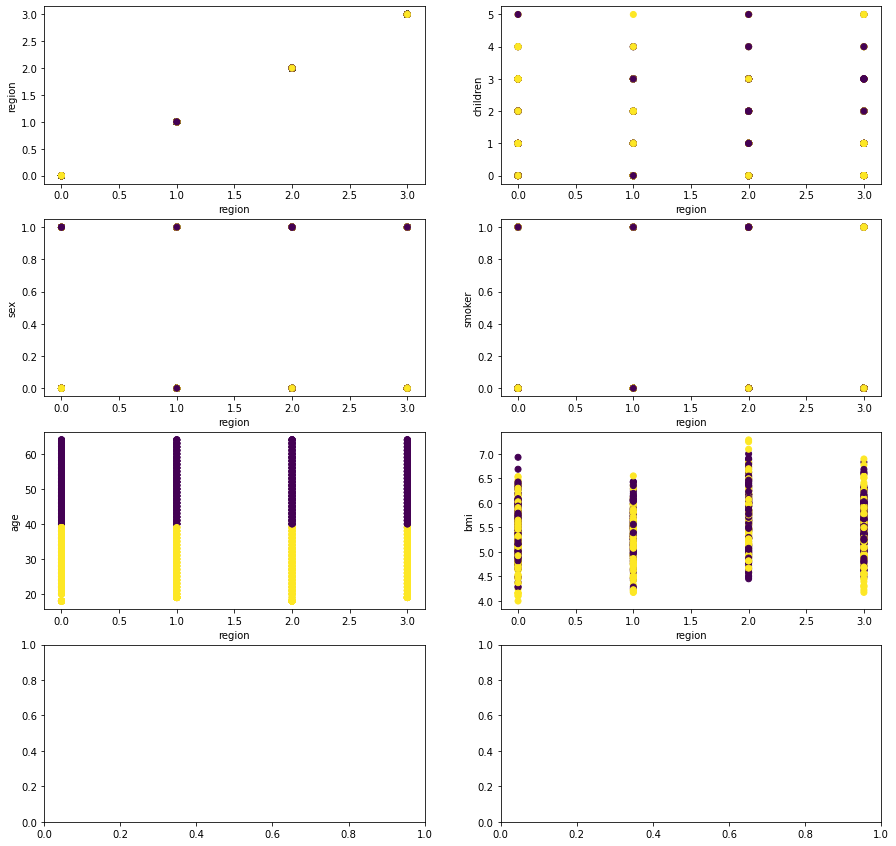

In [64]:
for col in x.columns:
    clustering(x,col,cluster)

# Analysis
1. There is clusters Between Age and BMI

#### Joining labels to dataframe

In [67]:
print(cluster)

[1 1 1 ... 1 1 0]


In [69]:
new_df=sqrt_trans_data.join(pd.DataFrame(cluster,columns=['cluster']),how='left')

In [70]:
new_df.head()

,age,sex,bmi,children,smoker,region,charges in INR,cluster
0,19,0,5.282045,0,1.0,3,16884.92400,1
1,18,1,5.811196,1,0.0,2,1725.55230,1
2,28,1,5.744563,3,0.0,2,4449.46200,1
3,33,1,4.764976,0,0.0,1,21984.47061,1
4,32,1,5.374012,0,0.0,1,3866.85520,1


In [71]:
new_f= new_df.groupby('cluster')['age','bmi'].agg(['mean','median'])

<ipython-input-71-2a15764fc04a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_f= new_df.groupby('cluster')['age','bmi'].agg(['mean','median'])


In [73]:
new_f.head()

age              bmi          
              mean median      mean    median
cluster                                      
0        51.548193   51.0  5.566231  5.582114
1        27.048961   27.0  5.454438  5.459396

In [74]:
new_df=new_df.merge(new_f,on="cluster",how='left')

C:\Users\ashish\anaconda3\lib\site-packages\pandas\core\frame.py:9186: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


In [75]:
new_df.head()

,age,sex,bmi,children,smoker,region,charges in INR,cluster,"(age, mean)","(age, median)","(bmi, mean)","(bmi, median)"
0,19,0,5.282045,0,1.0,3,16884.92400,1,27.048961,27.0,5.454438,5.459396
1,18,1,5.811196,1,0.0,2,1725.55230,1,27.048961,27.0,5.454438,5.459396
2,28,1,5.744563,3,0.0,2,4449.46200,1,27.048961,27.0,5.454438,5.459396
3,33,1,4.764976,0,0.0,1,21984.47061,1,27.048961,27.0,5.454438,5.459396
4,32,1,5.374012,0,0.0,1,3866.85520,1,27.048961,27.0,5.454438,5.459396


In [76]:
new_df.drop('cluster',axis=1)

,age,sex,bmi,children,smoker,region,charges in INR,"(age, mean)","(age, median)","(bmi, mean)","(bmi, median)"
0,19,0,5.282045,0,1.0,3,16884.92400,27.048961,27.0,5.454438,5.459396
1,18,1,5.811196,1,0.0,2,1725.55230,27.048961,27.0,5.454438,5.459396
2,28,1,5.744563,3,0.0,2,4449.46200,27.048961,27.0,5.454438,5.459396
3,33,1,4.764976,0,0.0,1,21984.47061,27.048961,27.0,5.454438,5.459396
4,32,1,5.374012,0,0.0,1,3866.85520,27.048961,27.0,5.454438,5.459396
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,5.565070,3,0.0,1,10600.54830,51.548193,51.0,5.566231,5.582114
1334,18,0,5.649779,0,0.0,0,2205.98080,27.048961,27.0,5.454438,5.459396
1335,18,0,6.070420,0,0.0,2,1629.83350,27.048961,27.0,5.454438,5.459396
1336,21,0,5.079370,0,0.0,3,2007.94500,27.048961,27.0,5.454438,5.459396


In [77]:
x=new_df.drop('charges in INR',axis=1)
y=new_df['charges in INR']

In [79]:
# Normal Model Accuracy
multiple_models(new_df,'charges in INR')

,Model_Name,RMSC,R2_score
0,LinearRegression,5777.310527,0.790698
1,SVR,13179.993348,-0.089313
2,Lasso,5777.651122,0.790673
3,Ridge,5783.640727,0.790239
4,Decision Tree,7006.698529,0.692143
5,XG_boost,5327.585513,0.822015
6,ADA_boost,4960.647740,0.845688
7,Random_forest,4717.064537,0.860470
8,Gradient_boosting,4273.624077,0.885471
9,KNN_Regressor,9668.790808,0.413772


In [80]:
k_fold_cv(x,y)

,model_names,score_mean,score_std
0,LinearRegression,0.744775,0.041517
1,SVR,-0.106463,0.031329
2,Lasso,0.744782,0.041498
3,Ridge,0.744788,0.041150
4,DecisionTree,0.696928,0.041771
5,XGBoost,0.810115,0.056858
6,ADA,0.813486,0.037757
7,RandomForest,0.833200,0.044193
8,Gradient_boost,0.856229,0.045005
9,K_Neighbours,0.389870,0.079685


In [83]:
k_fold_cv1(x,y)

,model_names,score_mean,score_std
0,LinearRegression,0.744775,0.041517
1,Ridge,0.744788,0.041150
2,XGBoost,0.810390,0.056537
3,ADA,0.828854,0.036194
4,RandomForest,0.838452,0.045229
5,Gradient_boost,0.856233,0.044967


## Analysis
1. There is not much difference in the accuracy after clustering

# Learning curve

In [84]:
def generate_learning_curve(model_name,estimator,x,y):
    train_size,train_score,test_score=learning_curve(estimator=estimator,X=x,y=y,cv=10)
    train_score_mean=np.mean(train_score,axis=1)
    test_score_mean=np.mean(test_score,axis=1)
    plt.plot(train_size,train_score_mean,c='blue')
    plt.plot(train_size,test_score_mean,c='red')
    plt.xlabel("Samples")
    plt.ylabel("Accuracies")
    plt.title("Learning Curve for" +model_name)
    plt.legend(('Training Accuracy','Testing Accuracy'))

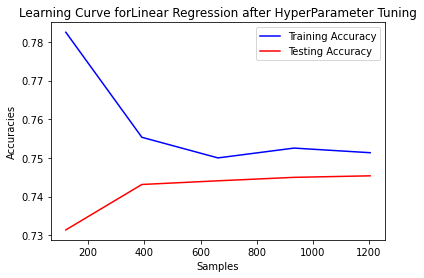

In [91]:
generate_learning_curve('Linear Regression after HyperParameter Tuning',LinearRegression(),sqrt_trans_data.drop('charges in INR',axis=1),sqrt_trans_data['charges in INR'])

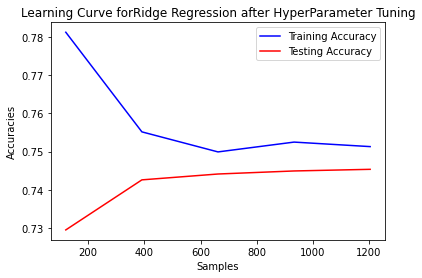

In [92]:
generate_learning_curve('Ridge Regression after HyperParameter Tuning',Ridge(alpha=1),sqrt_trans_data.drop('charges in INR',axis=1),sqrt_trans_data['charges in INR'])

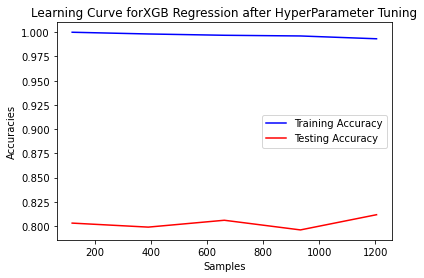

In [93]:
generate_learning_curve('XGB Regression after HyperParameter Tuning',XGBRegressor(alpha=0,gamma =100,reg_lambda=1),sqrt_trans_data.drop('charges in INR',axis=1),sqrt_trans_data['charges in INR'])

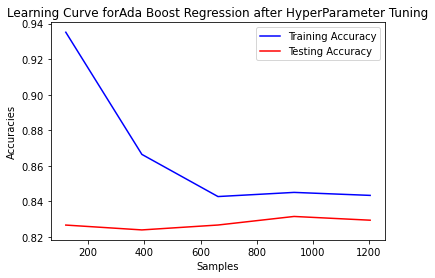

In [95]:
generate_learning_curve('Ada Boost Regression after HyperParameter Tuning',AdaBoostRegressor(learning_rate=0.1),sqrt_trans_data.drop('charges in INR',axis=1),sqrt_trans_data['charges in INR'])

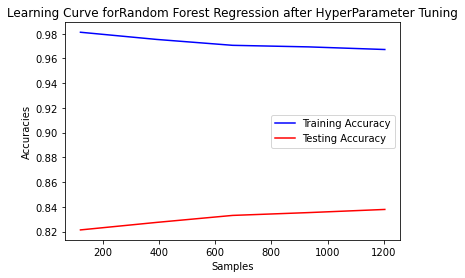

In [96]:
generate_learning_curve('Random Forest Regression after HyperParameter Tuning',RandomForestRegressor(max_depth=10,n_estimators=400),sqrt_trans_data.drop('charges in INR',axis=1),sqrt_trans_data['charges in INR'])

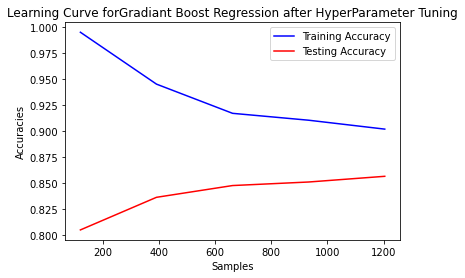

In [97]:
generate_learning_curve('Gradiant Boost Regression after HyperParameter Tuning',GradientBoostingRegressor(alpha=0.5),sqrt_trans_data.drop('charges in INR',axis=1),sqrt_trans_data['charges in INR'])

# LEARNING CURVE AFTER CLUSTERING

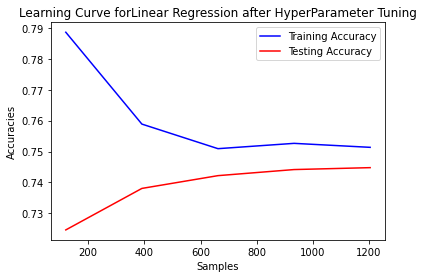

In [98]:
generate_learning_curve('Linear Regression after HyperParameter Tuning',LinearRegression(),new_df.drop('charges in INR',axis=1),new_df['charges in INR'])

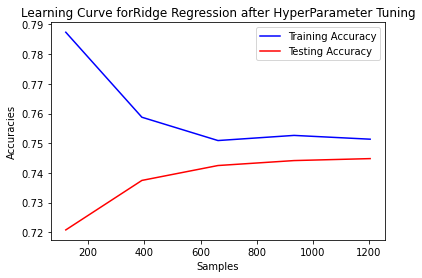

In [99]:
generate_learning_curve('Ridge Regression after HyperParameter Tuning',Ridge(alpha=1),new_df.drop('charges in INR',axis=1),new_df['charges in INR'])

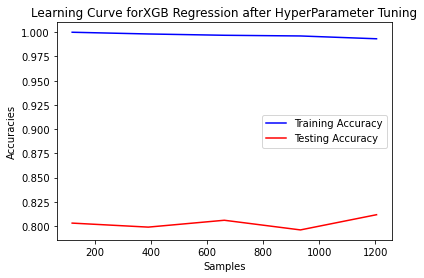

In [100]:
generate_learning_curve('XGB Regression after HyperParameter Tuning',XGBRegressor(alpha=0,gamma =100,reg_lambda=1),new_df.drop('charges in INR',axis=1),new_df['charges in INR'])

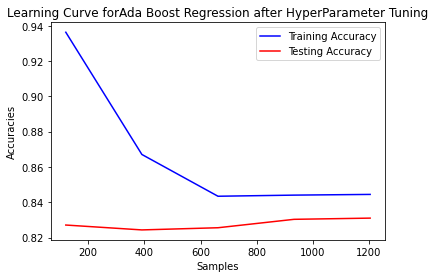

In [101]:
generate_learning_curve('Ada Boost Regression after HyperParameter Tuning',AdaBoostRegressor(learning_rate=0.1),new_df.drop('charges in INR',axis=1),new_df['charges in INR'])

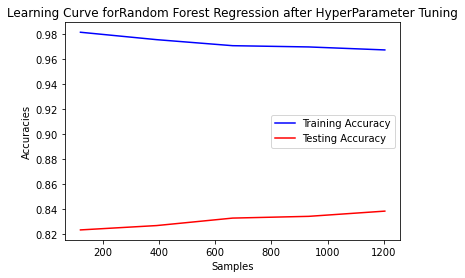

In [102]:
generate_learning_curve('Random Forest Regression after HyperParameter Tuning',RandomForestRegressor(max_depth=10,n_estimators=400),new_df.drop('charges in INR',axis=1),new_df['charges in INR'])

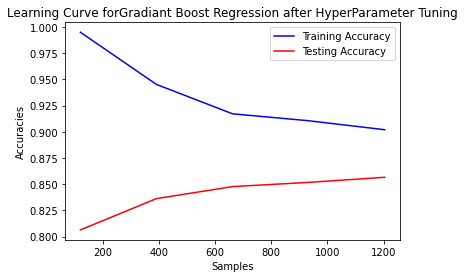

In [103]:
generate_learning_curve('Gradiant Boost Regression after HyperParameter Tuning',GradientBoostingRegressor(alpha=0.5),new_df.drop('charges in INR',axis=1),new_df['charges in INR'])